In [6]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("Chicago Crimes Analysis").getOrCreate()

file_path = r'C:\Users\AbuSaad\Documents\Big Data Analytics\BDAT1002 - Data Systems Architecture\Final Project\Chicago_Crimes.csv'

# Read the CSV data into a Spark DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows of the DataFrame
df.show()

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE|

In [9]:
#Create a Temporary View:
df.createOrReplaceTempView("chicago_crimes")


In [11]:
#Find the top 5 most common crime types:
result_df = spark.sql(
    """
    SELECT `Primary Type`, COUNT(*) as Total 
    FROM chicago_crimes 
    GROUP BY `Primary Type` 
    ORDER BY Total DESC 
    LIMIT 5
    """
)
result_df.show()

+---------------+-------+
|   Primary Type|  Total|
+---------------+-------+
|          THEFT|1647915|
|        BATTERY|1427736|
|CRIMINAL DAMAGE| 890391|
|      NARCOTICS| 748161|
|        ASSAULT| 509714|
+---------------+-------+



In [14]:
#check for duplicates in your Spark DataFrame,
original_count = df.count()
distinct_count = df.distinct().count()
duplicates = df.groupBy(df.columns).count().filter("'count' > 1")
duplicates.show()


+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+-----+
| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|count|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+-----+
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+-----+



In [16]:
#Determine the number of crimes that resulted in arrests each year.
spark.sql("""
    SELECT Year, COUNT(*) as Total_Arrests
    FROM chicago_crimes
    WHERE Arrest = true
    GROUP BY Year
    ORDER BY Year
""").show()

+----+-------------+
|Year|Total_Arrests|
+----+-------------+
|2001|       141933|
|2002|       141563|
|2003|       141587|
|2004|       144700|
|2005|       140923|
|2006|       135418|
|2007|       131877|
|2008|       110013|
|2009|       110825|
|2010|       100538|
|2011|        96285|
|2012|        90660|
|2013|        86537|
|2014|        79628|
|2015|        70038|
|2016|        53024|
|2017|        52643|
|2018|        53866|
|2019|        56210|
|2020|        34098|
+----+-------------+
only showing top 20 rows



In [17]:
#Find the distribution of crimes across different districts.
spark.sql("""
    SELECT District, COUNT(*) as Crime_Count
    FROM chicago_crimes
    GROUP BY District
    ORDER BY Crime_Count DESC
""").show()

+--------+-----------+
|District|Crime_Count|
+--------+-----------+
|       8|     524899|
|      11|     501221|
|       6|     456827|
|       7|     451577|
|      25|     444424|
|       4|     443475|
|       3|     396170|
|      12|     387246|
|       9|     381600|
|       2|     369847|
|      19|     350710|
|      18|     350615|
|       5|     346140|
|      10|     336555|
|      15|     334687|
|       1|     316007|
|      14|     302213|
|      16|     261526|
|      22|     256031|
|      24|     236003|
+--------+-----------+
only showing top 20 rows



In [18]:
#Analyze the trend of "THEFT" as a crime over the years. 
spark.sql("""
    SELECT Year, COUNT(*) as Total_Thefts
    FROM chicago_crimes
    WHERE `Primary Type` = 'THEFT'
    GROUP BY Year
    ORDER BY Year
""").show()

+----+------------+
|Year|Total_Thefts|
+----+------------+
|2001|       99277|
|2002|       98332|
|2003|       98876|
|2004|       95463|
|2005|       85684|
|2006|       86240|
|2007|       85156|
|2008|       88435|
|2009|       80975|
|2010|       76757|
|2011|       75152|
|2012|       75466|
|2013|       71534|
|2014|       61568|
|2015|       57350|
|2016|       61620|
|2017|       64382|
|2018|       65286|
|2019|       62491|
|2020|       41318|
+----+------------+
only showing top 20 rows



In [19]:
#Determine the correlation between arrests and domestic crimes.
spark.sql("""
    SELECT Domestic, Arrest, COUNT(*) as Count
    FROM chicago_crimes
    GROUP BY Domestic, Arrest
""").show()

+--------+------+-------+
|Domestic|Arrest|  Count|
+--------+------+-------+
|    true| false| 878335|
|    true|  true| 202752|
|   false| false|4895269|
|   false|  true|1835355|
+--------+------+-------+



# Visualiations - visualizing the results from the above queries using Python's matplotlib and seaborn libraries.

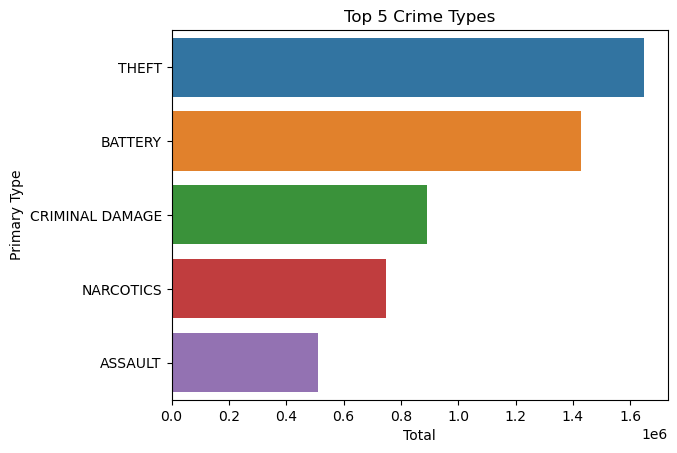

In [21]:
# Top 5 Crime Types:
top_crimes_df = spark.sql("""
    SELECT `Primary Type`, COUNT(*) as Total
    FROM chicago_crimes
    GROUP BY `Primary Type`
    ORDER BY Total DESC
    LIMIT 5
""").toPandas()

sns.barplot(x='Total', y='Primary Type', data=top_crimes_df)
plt.title('Top 5 Crime Types')
plt.show()


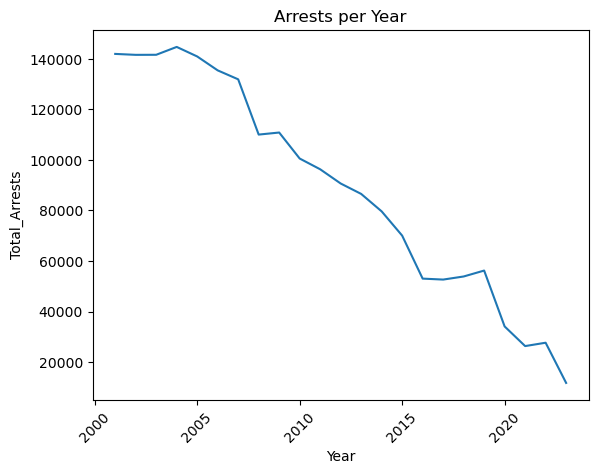

In [22]:
#Crimes Resulting in Arrests Each Year:
arrests_df = spark.sql("""
    SELECT Year, COUNT(*) as Total_Arrests
    FROM chicago_crimes
    WHERE Arrest = true
    GROUP BY Year
    ORDER BY Year
""").toPandas()

sns.lineplot(x='Year', y='Total_Arrests', data=arrests_df)
plt.title('Arrests per Year')
plt.xticks(rotation=45)
plt.show()

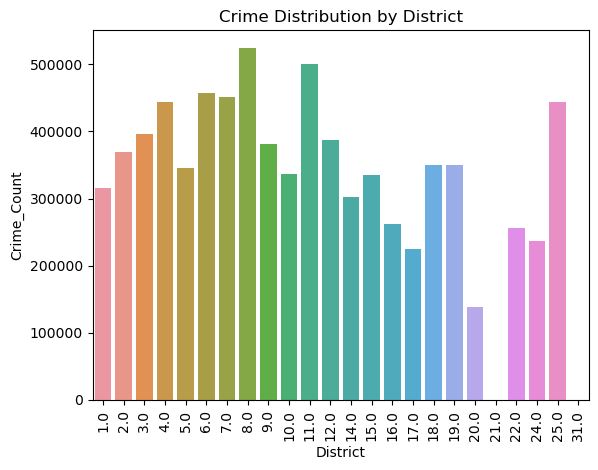

In [24]:
#Crime Distribution Across Districts:
district_df = spark.sql("""
    SELECT District, COUNT(*) as Crime_Count
    FROM chicago_crimes
    GROUP BY District
    ORDER BY Crime_Count DESC
""").toPandas()

sns.barplot(x='District', y='Crime_Count', data=district_df)
plt.title('Crime Distribution by District')
plt.xticks(rotation=90)
plt.show()